#Spam-Detect-Y 📩

---



**SpamDetectY**- Email and SMS spam detector ML. **This is notebook contains the source code for the open-source project SpamDetectY**

#Introduction
Features of SpamDetectY are as follows :-



1.   Spam/Phising email detection
2.   Spam sms detection
3.   Uses modern machine learning techniques to achieve the  above mentioned features



#Platforms
1.  Provides powerful api
2.  Available in the form of browser extension
3.  Available in the form of android and ios app
4.  Available in the form of desktop app for windows , mac os , linux

#Important Links


*   Github - https://github.com/akhichit2008/Spam-Detector-Y/
*   Manual - https://github.com/akhichit2008/Spam-Detector-Y/blob/main/README.md




**Import - "Libraries and Frameworks"**

In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score , classification_report,precision_score , recall_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
import pickle
import os
import shutil

**Exploring the dataset**

   spam                                            message
0     1  Subject: naturally irresistible your corporate...
1     1  Subject: the stock trading gunslinger  fanny i...
2     1  Subject: unbelievable new homes made easy  im ...
3     1  Subject: 4 color printing special  request add...
4     1  Subject: do not have money , get software cds ...


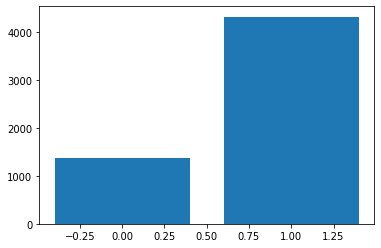

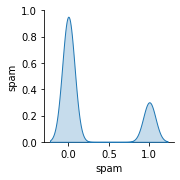

In [38]:
data = pd.read_csv("/content/spamDETECTYDataset1")
data.shape
data.columns
data["message"] = data["text"]
del data["text"]
data.drop_duplicates(inplace=True)
print(data.head())
x = data['spam'].unique()
y = data['spam'].value_counts()
pielabels = ['ham','spam']
fig = plt.bar(x,y)
plt.show()
sns.pairplot(data[["message","spam"]],diag_kind="kde")

**Text Pre Processing and Tokenization**

In [4]:
nltk.download('stopwords')
def textPreProcess(message):
  non_punc = [char for char in message if char not in string.punctuation]
  non_punc = ''.join(non_punc)
  cleaned_version = [word for word in non_punc.split() if word.lower() not in stopwords.words('english')]
  return cleaned_version

data['message'].head().apply(textPreProcess)
cv = CountVectorizer(analyzer=textPreProcess).fit_transform(data['message'])
x_train , x_test , y_train , y_test = train_test_split(cv,data['spam'],test_size=0.20)
cv.shape

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(5695, 37229)

**Creating and Training the Model**

In [5]:
mdl = MultinomialNB()
mdl.fit(x_train,y_train)
prediction = mdl.predict(x_train)
print(classification_report(y_train,prediction))
print("Acc {}".format(accuracy_score(y_train,prediction)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3476
           1       0.99      1.00      0.99      1080

    accuracy                           1.00      4556
   macro avg       0.99      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556

Acc 0.9971466198419666


**Testing the Model**

In [8]:
test_data = x_test
prediction = mdl.predict(x_test)
print(classification_report(y_test,prediction))
print("Acc {}".format(accuracy_score(y_test,prediction)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       851
           1       0.95      0.99      0.97       288

    accuracy                           0.98      1139
   macro avg       0.97      0.99      0.98      1139
weighted avg       0.98      0.98      0.98      1139

Acc 0.9833187006145742


**Method for use in and by the api**

In [29]:
def use_model(data,model):
  if type(data) == dict:
    df = pd.DataFrame(data,index=[0])
    message = df["message"].apply(textPreProcess)
    model.predict(message)
  else:
    print("Bad Data.The given data was not in a proper format") 
  textPreProcess()  
  pre = model.predict(data)
  print(classification_report(data,pre))
  print("Acc {}".format(accuracy_score(data,pre)))

**Packaging the model to a binary file**

In [12]:
final_model = mdl
with open("sdy.bin","wb") as md_file:
    pickle.dump(final_model,md_file)
    md_file.close()

Testing api method locally inside of the same notebook

In [ ]:
data = {
    "message":"This is spam"
}
with open("/content/sdy.bin","rb") as md_file:
  model = pickle.load(md_file)
  md_file.close()
pre = use_model(data,model) 
print(pre)  